In [82]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pickle
from tensorflow.keras.models import load_model
from tensorflow.math import confusion_matrix
from helper import data_import, relabel
from tensorflow.keras import Model

In [2]:
train_path='./Group_10/train'
test_path='./Group_10/test'
val_path='./Group_10/val'

# All of these are lists. Images are not of same shape, hence can't have np.array()
x_train, y_train = data_import(train_path)
x_test, y_test = data_import(test_path)
x_val, y_val = data_import(val_path)

y_train = relabel(y_train)
y_test = relabel(y_test)
y_val = relabel(y_val)

# Architechture 1

In [3]:
model = load_model("./models/architecture1.h5")
model.summary()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "Architecture1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        3216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)  

2023-04-30 21:48:12.157707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-30 21:48:12.158210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
print("Train loss and accuracy for architechture 1:")
loss, acc = model.evaluate(x_train, y_train, verbose=0)
y_pdfs = model(x_train)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_train, y_pred).numpy())

Train loss and accuracy for architechture 1:


2023-04-30 21:48:12.436954: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-30 21:48:12.570987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss 0.0005
Accuracy: 1.0000
[[50  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]


In [5]:
print("Validation loss and accuracy for architechture 1:")
loss, acc = model.evaluate(x_val, y_val, verbose=0)
y_pdfs = model(x_val)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_val, y_pred).numpy())

Validation loss and accuracy for architechture 1:
Loss 1.0148
Accuracy: 0.8000
[[10  0  0  0  0]
 [ 0  7  1  0  2]
 [ 1  0  7  2  0]
 [ 0  1  1  8  0]
 [ 1  0  0  1  8]]


In [6]:
print("Test loss and accuracy for architechture 1:")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
y_pdfs = model(x_test)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred).numpy())

Test loss and accuracy for architechture 1:
Loss 0.9791
Accuracy: 0.7800
Confusion matrix:
[[17  1  0  1  1]
 [ 0 17  0  1  2]
 [ 1  1 17  1  0]
 [ 0  1  2 15  2]
 [ 0  7  0  1 12]]


# Architechture 2

In [7]:
model = load_model("./models/architecture2.h5")
model.summary()

Model: "Architecture2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        3216      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                     

In [8]:
print("Train loss and accuracy for architechture 2:")
loss, acc = model.evaluate(x_train, y_train, verbose=0)
y_pdfs = model(x_train)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_train, y_pred).numpy())

Train loss and accuracy for architechture 2:


2023-04-30 21:48:13.549421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss 0.0005
Accuracy: 1.0000
[[50  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]


In [9]:
print("Validation loss and accuracy for architechture 2:")
loss, acc = model.evaluate(x_val, y_val, verbose=0)
y_pdfs = model(x_val)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_val, y_pred).numpy())

Validation loss and accuracy for architechture 2:
Loss 0.9502
Accuracy: 0.8400
[[10  0  0  0  0]
 [ 0  7  1  0  2]
 [ 0  0  7  1  2]
 [ 0  1  0  9  0]
 [ 0  0  1  0  9]]


In [10]:
print("Test loss and accuracy for architechture 2:")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
y_pdfs = model(x_test)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred).numpy())

Test loss and accuracy for architechture 2:
Loss 1.1578
Accuracy: 0.7600
Confusion matrix:
[[17  2  0  0  1]
 [ 0 15  0  1  4]
 [ 1  2 16  1  0]
 [ 1  1  2 14  2]
 [ 0  5  0  1 14]]


# Architechture 3

In [11]:
model = load_model("./models/architecture3.h5")
model.summary()

Model: "Architecture3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        3216      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)     

In [12]:
print("Train loss and accuracy for architechture 3:")
loss, acc = model.evaluate(x_train, y_train, verbose=0)
y_pdfs = model(x_train)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_train, y_pred).numpy())

Train loss and accuracy for architechture 3:


2023-04-30 21:48:14.391475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Loss 0.0006
Accuracy: 1.0000
[[50  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]


In [13]:
print("Validation loss and accuracy for architechture 3:")
loss, acc = model.evaluate(x_val, y_val, verbose=0)
y_pdfs = model(x_val)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_val, y_pred).numpy())

Validation loss and accuracy for architechture 3:
Loss 0.9665
Accuracy: 0.8200
[[10  0  0  0  0]
 [ 0  8  1  0  1]
 [ 1  0  7  1  1]
 [ 0  1  1  8  0]
 [ 0  2  0  0  8]]


In [14]:
print("Test loss and accuracy for architechture 3:")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
y_pdfs = model(x_test)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred).numpy())

Test loss and accuracy for architechture 3:
Loss 1.2955
Accuracy: 0.7600
Confusion matrix:
[[17  2  0  0  1]
 [ 0 16  1  1  2]
 [ 1  0 17  1  1]
 [ 0  1  3 15  1]
 [ 1  7  0  1 11]]


# Best Architecture (architecture 2)

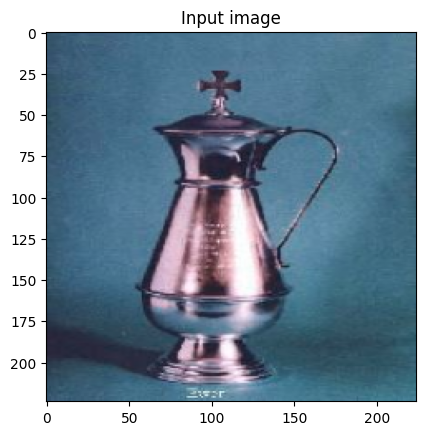

In [86]:
tf.random.set_seed(35)
idx = tf.random.uniform(shape=(1,),
                  minval=0, maxval=250, 
                  dtype=tf.dtypes.int32)
img = x_train[idx, :, :, :].reshape(224, 224, 3)
plt.figure()
plt.title("Input image")
plt.imshow(img)
img = img.reshape(1, 224, 224, 3)

In [90]:
model = load_model("./models/architecture2.h5")

#itterate over layers to find conv layers
features = []
for layer in model.layers:
    if "conv" in layer.name:
        # print(layer.name)
        features.append(layer.output)
map_model = Model(inputs=model.input, outputs=features)

In [91]:
map_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        3216      
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
Total params: 10,768
Trainable params: 10,768
Non-trainable params: 0
_________________________________________________________________


In [99]:
feature_maps = map_model.predict(img)

1/1 [==============================] - 0s 119ms/step


2023-04-30 23:03:34.475961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


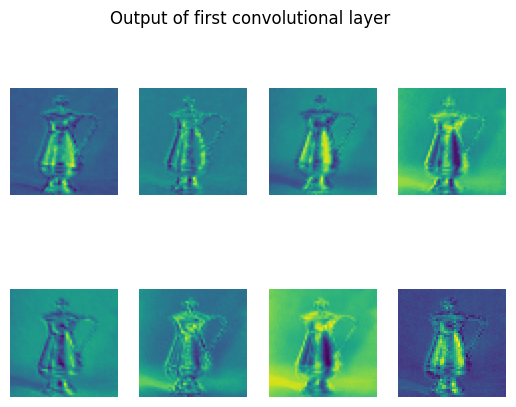

In [102]:
plt.figure()
plt.suptitle("Output of first convolutional layer")
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(feature_maps[0][0, :, :, i])
    # print(feature_maps[0][1, :, :, i])
    plt.axis("off")
    

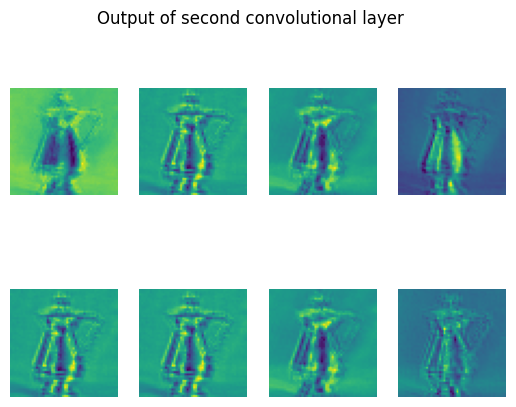

In [106]:
plt.figure()
plt.suptitle("Output of second convolutional layer")
tf.random.set_seed(35)
idx = tf.random.uniform(shape=(8,), minval=0, maxval=16, dtype=tf.dtypes.int32)
for n, i in enumerate(idx):
    plt.subplot(2,4,n+1)
    plt.imshow(feature_maps[1][0, :, :, i])
    # print(feature_maps[0][1, :, :, i])
    plt.axis("off")

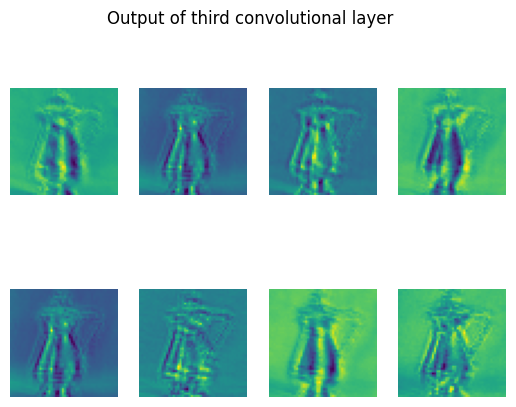

In [107]:
plt.figure()
plt.suptitle("Output of third convolutional layer")
tf.random.set_seed(35)
idx = tf.random.uniform(shape=(8,), minval=0, maxval=32, dtype=tf.dtypes.int32)
for n, i in enumerate(idx):
    plt.subplot(2,4,n+1)
    plt.imshow(feature_maps[2][0, :, :, i])
    # print(feature_maps[0][1, :, :, i])
    plt.axis("off")

# Transfer learned VGG19

In [15]:
model = load_model("./models/vgg19_mod.h5")
model.summary()

Model: "Modified-VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)    

In [45]:
print("Train loss and accuracy for Transfer learned from VGG19 model:")
loss, acc = model.evaluate(x_train, y_train, verbose=0)
y_pdfs = model.predict(x_train, verbose=0)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_train, y_pred).numpy())

Train loss and accuracy for Transfer learned from VGG19 model:
Loss 0.0000
Accuracy: 1.0000
[[50  0  0  0  0]
 [ 0 50  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 50  0]
 [ 0  0  0  0 50]]


In [38]:
print("Validation loss and accuracy for Transfer learned from VGG19 model:")
loss, acc = model.evaluate(x_val, y_val, verbose=0)
y_pdfs = model(x_val)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print(confusion_matrix(y_val, y_pred).numpy())

Validation loss and accuracy for Transfer learned from VGG19 model:
Loss 0.0000
Accuracy: 1.0000
[[10  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


In [18]:
print("Test loss and accuracy for Transfer learned from VGG19 model:")
loss, acc = model.evaluate(x_test, y_test, verbose=0)
y_pdfs = model(x_test)
y_pred = tf.argmax(y_pdfs, axis=1)
print(f"Loss {loss:.4f}")
print(f"Accuracy: {acc:.4f}")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred).numpy())

Test loss and accuracy for Transfer learned from VGG19 model:
Loss 0.0000
Accuracy: 1.0000
Confusion matrix:
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]
